In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Training_Data_Set.csv")
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4,5,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5,5,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4,5,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,None,None,diesel,874352.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

df.shape

In [5]:
df.corr()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000282,0.001935,-0.001935,0.003698,0.002456,0.005602,0.003195
Distance,-0.000282,1.000000,-0.229124,0.229124,0.111261,0.012034,-0.006298,-0.158515
manufacture_year,0.001935,-0.229124,1.000000,-1.000000,-0.090401,0.051245,0.003985,0.506707
Age of car,-0.001935,0.229124,-1.000000,1.000000,0.090401,-0.051245,-0.003985,-0.506707
engine_displacement,0.003698,0.111261,-0.090401,0.090401,1.000000,0.387959,-0.005828,0.162072
engine_power,0.002456,0.012034,0.051245,-0.051245,0.387959,1.000000,-0.001790,0.627944
Vroom Audit Rating,0.005602,-0.006298,0.003985,-0.003985,-0.005828,-0.001790,1.000000,0.005109
Price,0.003195,-0.158515,0.506707,-0.506707,0.162072,0.627944,0.005109,1.000000


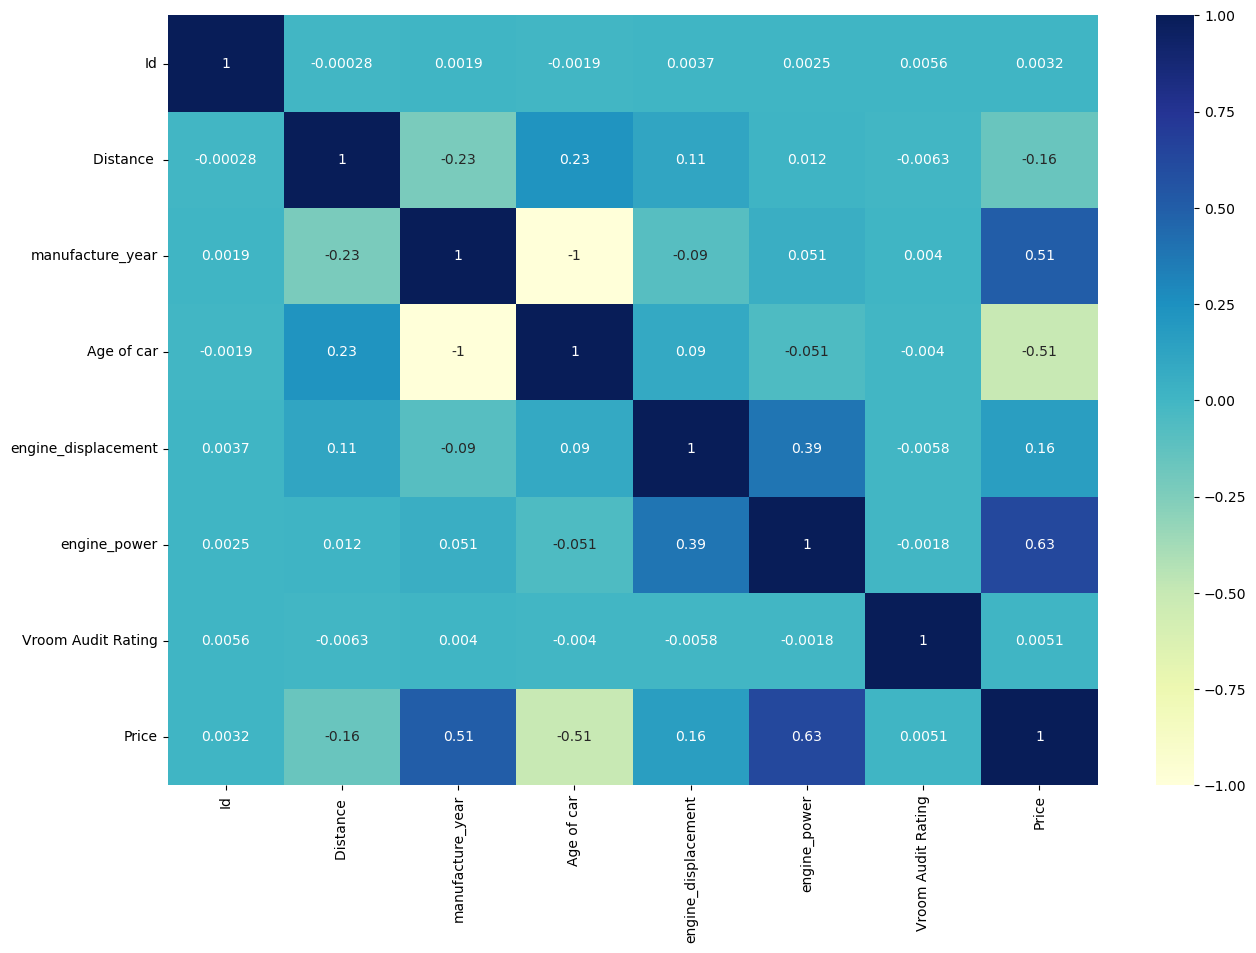

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [7]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [9]:
df1=df.copy()

In [10]:
df1.rename(columns = {'Distance ':'Distance','Owner Type':'Owner_Type','Age of car':'Age_of_car','Vroom Audit Rating':'Vroom_Audit_Rating'}, inplace = True)

In [11]:
df1.dropna(subset=["engine_power"],inplace=True)

In [12]:
df1.dropna(subset=["Distance"],inplace=True)

In [13]:
df1["body_type"] = df1["body_type"].fillna(df1["body_type"].mode())

In [14]:
df1.dropna(subset=["body_type"],inplace=True)

In [15]:
df1.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner_Type             0
manufacture_year       0
Age_of_car             0
engine_displacement    0
engine_power           0
body_type              0
Vroom_Audit_Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [16]:
df1["engine_power"].isnull().sum()

0

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
df1['Maker'] = label_encoder.fit_transform(df1['Maker']) 
df1['model'] = label_encoder.fit_transform(df1['model'])
df1['Owner_Type'] = label_encoder.fit_transform(df1['Owner_Type'])
df1['transmission'] = label_encoder.fit_transform(df1['transmission'])
df1['Location'] = label_encoder.fit_transform(df1['Location'])
df1['fuel_type'] = label_encoder.fit_transform(df1['fuel_type'])


In [19]:
df1["body_type"].unique()

array(['compact', 'van'], dtype=object)

In [21]:
df1['door_count'].replace({'None':0},inplace=True)
df1["door_count"]=df1["door_count"].astype("int")
df1['seat_count'].replace({'None':0},inplace=True)
df1["seat_count"]=df1["seat_count"].astype("int")

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2689 entries, 49 to 53513
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2689 non-null   int64  
 1   Maker                2689 non-null   int32  
 2   model                2689 non-null   int32  
 3   Location             2689 non-null   int32  
 4   Distance             2689 non-null   float64
 5   Owner_Type           2689 non-null   int32  
 6   manufacture_year     2689 non-null   int64  
 7   Age_of_car           2689 non-null   int64  
 8   engine_displacement  2689 non-null   int64  
 9   engine_power         2689 non-null   float64
 10  body_type            2689 non-null   object 
 11  Vroom_Audit_Rating   2689 non-null   int64  
 12  transmission         2689 non-null   int32  
 13  door_count           2689 non-null   int32  
 14  seat_count           2689 non-null   int32  
 15  fuel_type            2689 non-null  

In [23]:
df1

,Id,Maker,model,Location,Distance,Owner_Type,manufacture_year,Age_of_car,engine_displacement,engine_power,body_type,Vroom_Audit_Rating,transmission,door_count,seat_count,fuel_type,Price
49,25050,5,8,0,222500.0,0,2008,11,1896,77.0,compact,4,1,0,0,0,518782.50
57,25058,5,8,10,208290.0,2,2006,13,1900,77.0,compact,4,1,0,0,1,402480.00
63,25064,5,8,5,168000.0,0,1999,20,25010,55.0,compact,8,1,0,0,1,97150.50
78,25079,5,8,1,208128.0,3,2009,10,2000,103.0,compact,8,1,0,0,0,580125.75
102,25103,5,8,7,161000.0,3,2008,11,2000,125.0,compact,4,1,0,0,0,638138.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53390,78391,5,8,7,8900.0,1,2015,4,2000,135.0,compact,7,1,0,0,0,1970734.50
53411,78412,5,8,4,198000.0,1,2016,3,1900,77.0,compact,7,1,0,0,0,305052.00
53430,78431,5,8,1,192125.0,0,2011,8,11100,77.0,compact,4,0,0,0,1,607883.25
53476,78477,5,16,9,119000.0,3,2010,9,2000,103.0,compact,6,0,0,0,1,938193.75


In [24]:
df1.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner_Type             0
manufacture_year       0
Age_of_car             0
engine_displacement    0
engine_power           0
body_type              0
Vroom_Audit_Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

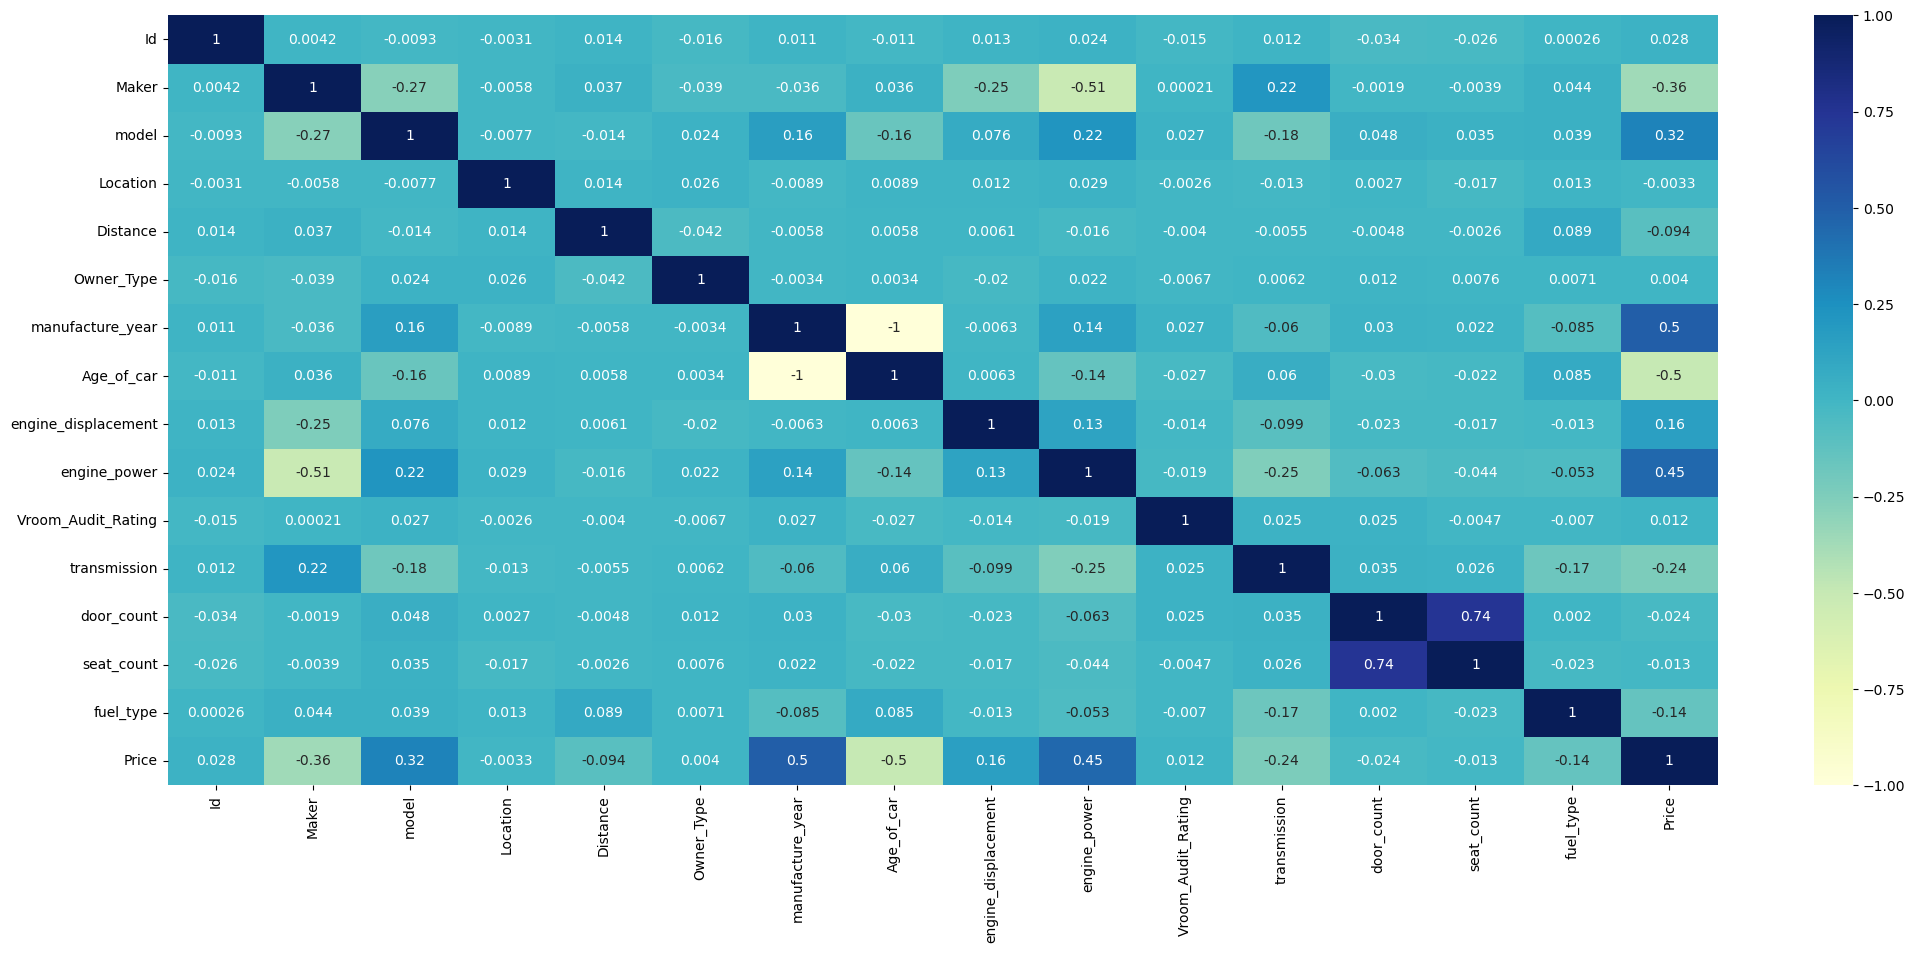

In [25]:
plt.figure(figsize=(25,10))
sns.heatmap(df1.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [26]:
x=df1[["Vroom_Audit_Rating","Age_of_car","Owner_Type","Distance","Location","model","engine_power","manufacture_year","Maker","Id","transmission","engine_displacement","model","fuel_type","door_count","seat_count"]]
y=df1[["Price"]]

In [27]:
model=LinearRegression()

In [28]:
model.fit(x,y)

LinearRegression()

In [29]:
y_pred=pd.DataFrame(model.predict(x))

In [30]:
mse=mean_squared_error(y,y_pred)

In [31]:
mse

74650123169.68465

In [32]:
rmse=math.sqrt(mse)

In [33]:
rmse

273221.7472487954

In [36]:
testd = pd.read_csv('Test_Data_Set.csv')
testd.sample()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
4592,15593,audi,q5,Kochi,86000.0,Second,2011,8,1968,125.0,NaN,4,man,4,5,diesel


In [37]:
testd

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,skoda,octavia,Mumbai,149976.0,First,2011,8,1968,103.0,NaN,8,man,4,5,diesel
5611,16612,skoda,superb,Ahmedabad,332000.0,First,2005,14,1896,96.0,NaN,6,man,4,5,diesel
5612,16613,skoda,octavia,Bangalore,230800.0,Second,2005,14,1896,77.0,NaN,7,man,5,5,diesel
5613,16614,nissan,qashqai,Jaipur,63480.0,Third,2011,8,1997,104.0,NaN,5,man,4,7,petrol


In [38]:
testd.rename(columns = {'Distance ':'Distance','Owner Type':'Owner_Type','Age of car':'Age_of_car','Vroom Audit Rating':'Vroom_Audit_Rating'}, inplace = True)

In [57]:
testd['Maker'] = label_encoder.fit_transform(testd['Maker']) 
testd['model'] = label_encoder.fit_transform(testd['model'])
testd['Owner_Type'] = label_encoder.fit_transform(testd['Owner_Type'])
testd['transmission'] = label_encoder.fit_transform(testd['transmission'])
testd['Location'] = label_encoder.fit_transform(testd['Location'])
testd['fuel_type'] = label_encoder.fit_transform(testd['fuel_type'])


In [58]:
testd['door_count'].replace({'None':0},inplace=True)
testd["door_count"]=testd["door_count"].astype("int")
testd['seat_count'].replace({'None':0},inplace=True)
testd["seat_count"]=testd["seat_count"].astype("int")

In [59]:
X=testd[["Vroom_Audit_Rating","Age_of_car","Owner_Type","Distance","Location","model","engine_power","manufacture_year","Maker","Id","transmission","engine_displacement","model","fuel_type","door_count","seat_count"]]

In [60]:
X.isna().sum()

Vroom_Audit_Rating       0
Age_of_car               0
Owner_Type               0
Distance               128
Location                 0
model                    0
engine_power           168
manufacture_year         0
Maker                    0
Id                       0
transmission             0
engine_displacement      0
model                    0
fuel_type                0
door_count               0
seat_count               0
dtype: int64

In [61]:
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5615 non-null   int64  
 1   Maker                5615 non-null   int64  
 2   model                5615 non-null   int64  
 3   Location             5615 non-null   int64  
 4   Distance             5487 non-null   float64
 5   Owner_Type           5615 non-null   int64  
 6   manufacture_year     5615 non-null   int64  
 7   Age_of_car           5615 non-null   int64  
 8   engine_displacement  5615 non-null   int64  
 9   engine_power         5447 non-null   float64
 10  body_type            423 non-null    object 
 11  Vroom_Audit_Rating   5615 non-null   int64  
 12  transmission         5615 non-null   int64  
 13  door_count           5615 non-null   int32  
 14  seat_count           5615 non-null   int32  
 15  fuel_type            5615 non-null   i

In [62]:
X['engine_power'] = X['engine_power'].fillna(X['engine_power'].median())
X['Distance'] = X['Distance'].fillna(X['Distance'].median())


In [63]:
Id = testd['Id']


In [64]:
y_test_pred = pd.DataFrame(model.predict(X),index = Id)

In [65]:
y_test_pred.columns = ['Price']

In [66]:
y_test_pred.to_csv('Jesin1.csv')